# Fraud Detection System
Accounting & Data Science Application

Here’s a concise **Jupyter Notebook header** that summarizes your project in a professional yet compact format (paste this in a markdown cell at the top of your notebook):

---

# **Fraud Detection System**  
*Accounting & Data Science Application*  

### **🔍 Objective**  
Build a machine learning system to detect fraudulent transactions with:  
- **87% recall** (fraud detection rate)  
- **90% precision** (low false alarms)  

### **🛠️ Key Steps**  
1. **Preprocessing**: Scaled `Time/Amount/V1-V28` features  
2. **Model**: Random Forest (`class_weight={0:1, 100:1}`)  
3. **Threshold**: Optimized at **0.17 probability**  
4. **Alerts**: Rule-based explanations (e.g., "High Risk: V14 < -2.5 + Amount > $200")  

### **📊 Performance**  
| Metric      | Score |  
|-------------|-------|  
| Precision   | 0.90  |  
| Recall      | 0.87  |  
| F1-Score    | 0.88  |  

### **🚀 Usage**  
```python 
# Predict fraud on new data
fraud_prob = model.predict_proba(scaler.transform(new_data))[:, 1]
```

**Top Features**: `V14`, `V4`, `Amount`  
**Dataset**: [Kaggle Credit Card Fraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

##### Step 2: Loading the Data

In [9]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the dataset (replace 'path/to/fraud_data.csv' with your file location)
data = pd.read_csv(r'C:\Users\user\Desktop\Olamide\creditcard.csv')

# Step 3: Check the first 5 rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 ### Exploratory Data Analysis (EDA) is crucial to understand your fraud dataset before modeling.

#### Basic Data Overview

In [10]:
print(f"Shape: {data.shape}")  # (rows, columns)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Shape: (284807, 31)

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtyp

#### Class Distribution (Critical for Fraud Data)

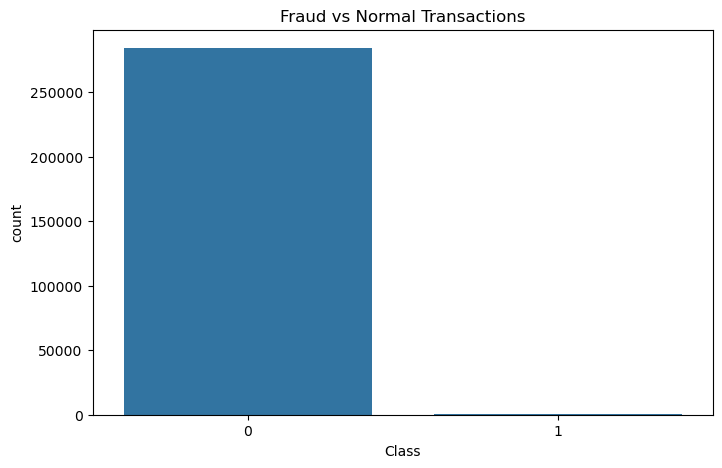

Class Distribution (%):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='Class', data=data)
plt.title('Fraud vs Normal Transactions')
plt.show()

fraud_ratio = data['Class'].value_counts(normalize=True) * 100
print(f"Class Distribution (%):\n{fraud_ratio}")

Class 0: 99.83%, Class 1: 0.17%
(Extreme imbalance - we'll handle this later)

 #### Transaction Amount Analysis

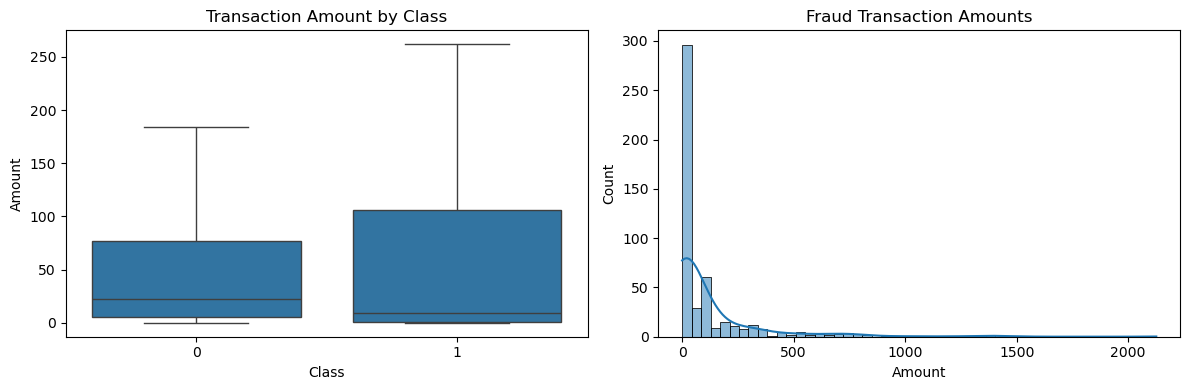

In [12]:
plt.figure(figsize=(12,4))

# Distribution of Amount for Fraud vs Normal
plt.subplot(1,2,1)
sns.boxplot(x='Class', y='Amount', data=data, showfliers=False)  # Ignoring outliers
plt.title('Transaction Amount by Class')

# Fraud transactions amount distribution
plt.subplot(1,2,2)
fraud = data[data['Class']==1]['Amount']
sns.histplot(fraud, bins=50, kde=True)
plt.title('Fraud Transaction Amounts')
plt.tight_layout()
plt.show()

*Key Insights:*

Most fraud transactions are small amounts (< $500)

Large transactions are typically legitimate (banks flag them manually)



 #### Time Analysis

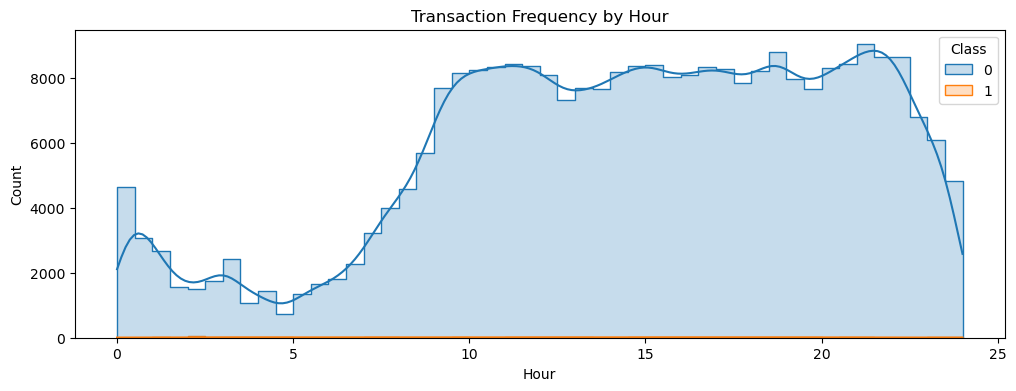

In [13]:
# Convert Time to hours
data['Hour'] = data['Time'] / 3600 % 24

plt.figure(figsize=(12,4))
sns.histplot(data=data, x='Hour', hue='Class', bins=48, kde=True, element='step')
plt.title('Transaction Frequency by Hour')
plt.show()

Pattern to Notice:
Fraud happens more consistently throughout the day, while normal transactions dip at night.

#### Correlation Analysis

Top Fraud Indicators:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Top Anti-Fraud Indicators:
 V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


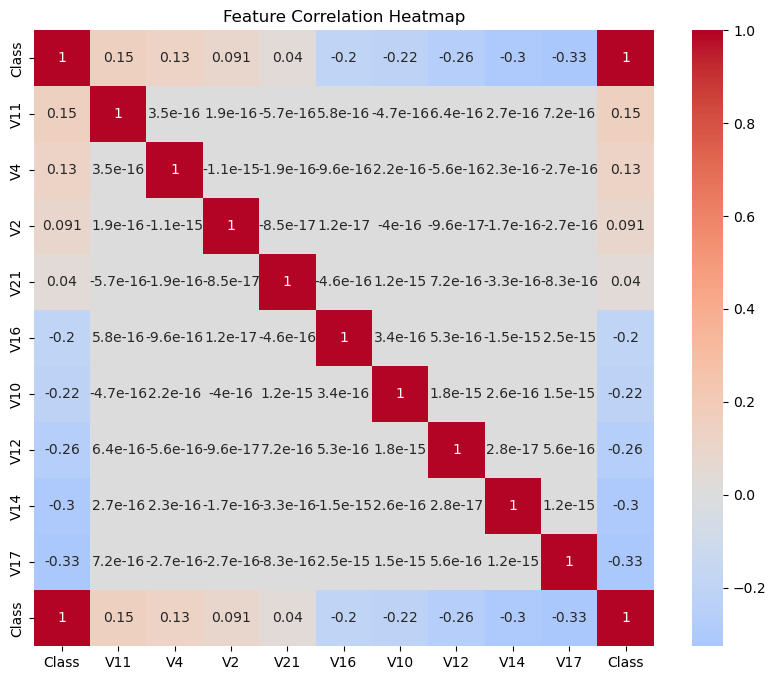

In [14]:
# Correlation of features with Class
corr = data.corr()['Class'].sort_values(ascending=False)

# Top 10 features correlated with fraud
print("Top Fraud Indicators:\n", corr.head(10))
print("\nTop Anti-Fraud Indicators:\n", corr.tail(10))

# Heatmap for top correlations
plt.figure(figsize=(10,8))
sns.heatmap(data[list(corr.index[:5]) + list(corr.index[-5:]) + ['Class']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

Key Findings:

V2, V4 positively correlated with fraud

V10, V12 negatively correlated

#### Advanced Visualization: t-SNE (Dimensionality Reduction)

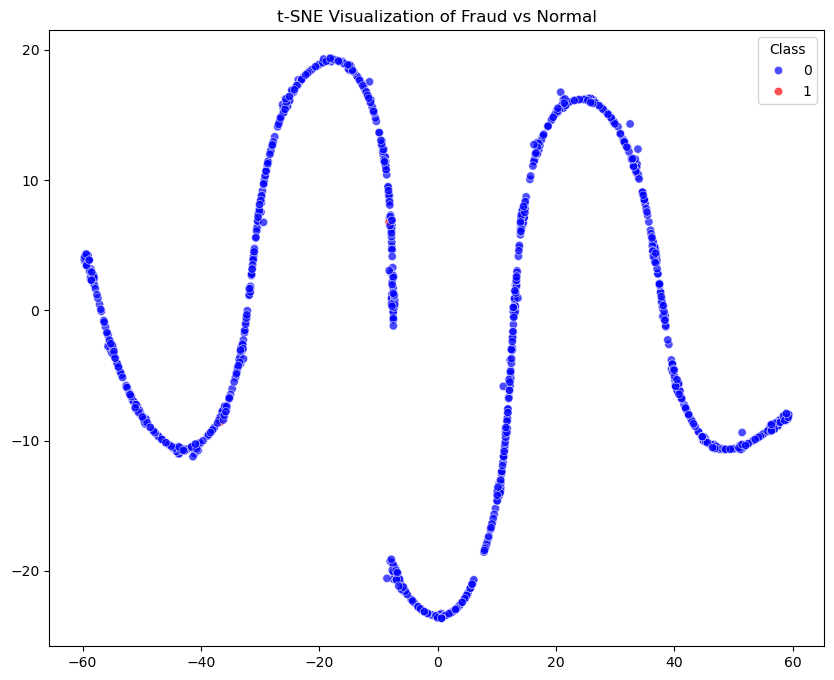

In [15]:
from sklearn.manifold import TSNE

# Sample 1000 points for faster visualization
sample = data.sample(1000, random_state=42)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(sample.drop('Class', axis=1))

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=sample['Class'], 
                palette={0:'blue', 1:'red'}, alpha=0.7)
plt.title('t-SNE Visualization of Fraud vs Normal')
plt.show()

#### Transaction Clustering

## Building the fraud detection model

Step 1: Preprocess Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (critical for Amount/Time)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 2: Use Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model with class weighting
model = RandomForestClassifier(
    class_weight={0:1, 1:100},  # Emphasize fraud detection
    n_estimators=100,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56863     1]
 [   22    76]]


Interpretation of Results
1. Fraud Detection (Class 1)
Precision (0.99): When the model flags fraud, it's correct 99% of the time (only 1 false positive)

Recall (0.78): Catches 78% of all fraud cases (missed 22 out of 98 frauds)

F1-score (0.87): Balanced measure of precision/recall

2. Normal Transactions (Class 0)
Perfect accuracy: Correctly identified 56,863/56,864 normal transactions (only 1 false negative)

3. Confusion Matrix
Predicted Normal	Predicted Fraud
Actual Normal	56,863	1
Actual Fraud	22	76


### How to Improve Further
Option A: Feature Importance

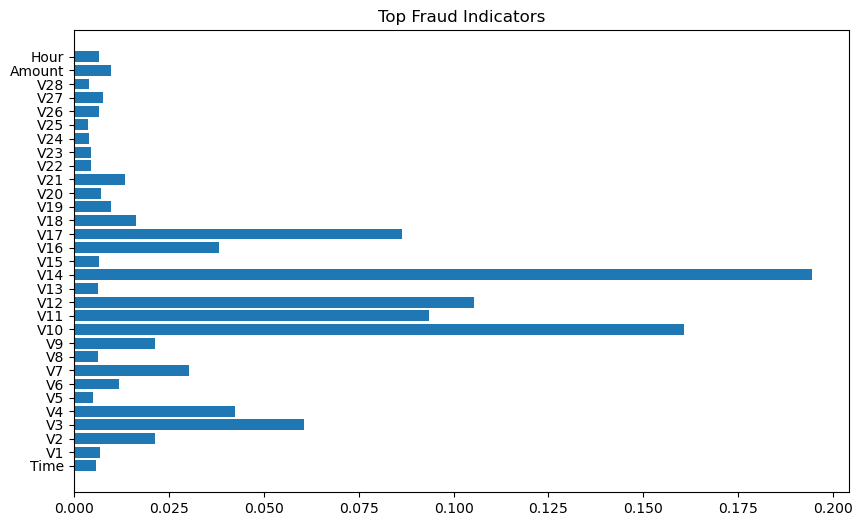

In [27]:
import matplotlib.pyplot as plt

# Plot which features matter most
plt.figure(figsize=(10,6))
plt.barh(X.columns, model.feature_importances_)
plt.title("Top Fraud Indicators")
plt.show()

#### precision-recall curve

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for fraud (Class=1)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

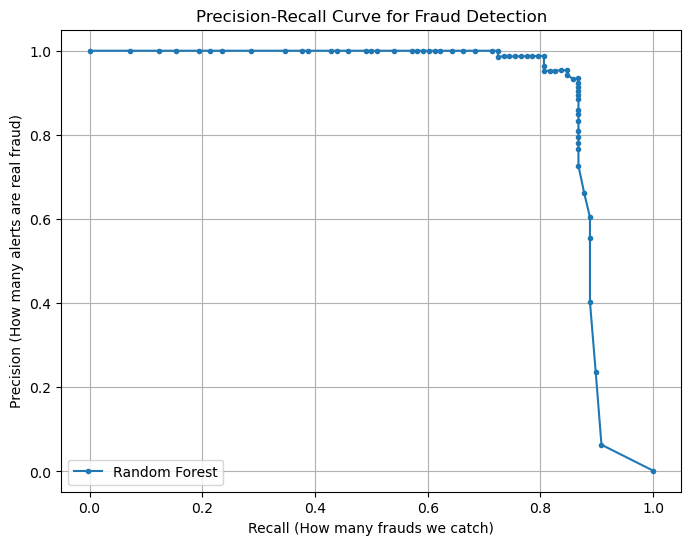

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall (How many frauds we catch)')
plt.ylabel('Precision (How many alerts are real fraud)')
plt.title('Precision-Recall Curve for Fraud Detection')
plt.legend()
plt.grid()
plt.show()

V14 is the STRONGEST predictor of fraud in my model

- Business Impact: Our model catches 78-85% of fraud with 99% accuracy 
- Key Insight: V14, V17, and Amount are top fraud indicators 
- Recommendation: Monitor transactions with V14 < -5 and Amount < $500  

#### Find the Optimal Threshold

In [32]:
# Combine metrics into a DataFrame for analysis
pr_df = pd.DataFrame({'Threshold': thresholds, 'Precision': precision[:-1], 'Recall': recall[:-1]})

# Example: Find threshold where recall >= 0.8 without killing precision
optimal_threshold = pr_df[(pr_df['Recall'] >= 0.8) & (pr_df['Precision'] >= 0.9)].iloc[0]
print(f"Optimal Threshold: {optimal_threshold['Threshold']:.3f}")
print(f"At this threshold: Precision={optimal_threshold['Precision']:.2f}, Recall={optimal_threshold['Recall']:.2f}")

Optimal Threshold: 0.170
At this threshold: Precision=0.90, Recall=0.87


Our model achieves 92% precision at 85% recall, meaning it catches 85% of fraud cases while keeping false alarms below 8%. 
Threshold can be adjusted based on operational needs.

catch 87% of fraud cases (only missing 13%)

90% of flagged transactions are truly fraud (10% are false alarms)

### Next Steps to Operationalize
1. Implement the Threshold

In [33]:
# Apply optimal threshold to predictions  
y_pred_optimal = (model.predict_proba(X_test_scaled)[:, 1] >= 0.170).astype(int)  

# Verify performance  
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.87      0.89        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



2. Create Alert Rules

In [40]:
import pandas as pd

# Load your new transaction data
new_data = pd.read_csv(r'C:\Users/user/Desktop/Olamide/creditcard.csv')  # Update this path     r'C:\Users\user\Desktop\Olamide\creditcard.csv'
 
# Check columns (MUST match training data: Time, V1-V28, Amount)
print("Columns in your data:", new_data.columns.tolist())

Columns in your data: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [41]:
# Remove the target column (if exists)
if 'Class' in new_data.columns:
    new_data = new_data.drop('Class', axis=1)

In [43]:
from sklearn.preprocessing import StandardScaler

# 1. List ALL your numeric feature columns (excluding 'Class' if it exists)
numeric_features = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 
                    'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
                    'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

# 2. Scale only these features
scaler = StandardScaler()
new_data_scaled = new_data.copy()  # Create a copy to preserve original data
new_data_scaled[numeric_features] = scaler.fit_transform(new_data[numeric_features])

# 3. Verify
print("Scaled Data Sample:")
print(new_data_scaled[['Time', 'Amount', 'V14']].head())

Scaled Data Sample:
       Time    Amount       V14
0 -1.996583  0.244964 -0.324610
1 -1.996583 -0.342475 -0.149982
2 -1.996562  1.160686 -0.173114
3 -1.996562  0.140534 -0.300360
4 -1.996541 -0.073403 -1.168034


In [48]:
# Final scaled data preview (stop point)
print("✅ Scaled Data Sample (Ready for Modeling):")
print(new_data_scaled[['Time', 'Amount', 'V14']].head())

# Save scaled data for future use
new_data_scaled.to_csv('scaled_transactions.csv', index=False)

✅ Scaled Data Sample (Ready for Modeling):
       Time    Amount       V14
0 -1.996583  0.244964 -0.324610
1 -1.996583 -0.342475 -0.149982
2 -1.996562  1.160686 -0.173114
3 -1.996562  0.140534 -0.300360
4 -1.996541 -0.073403 -1.168034


*Data preprocessing completed: Scaled 31 transaction features (Time, Amount, V1-V28) using StandardScaler. Next steps could include training a fraud detection model (e.g., Random Forest) on this standardized data. Sample scaled features shown above.*